<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Building-a-Content-Based-Movie-Recommender-System/blob/master/building_a_content_based_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">CONTENT-BASED FILTERING</font></h1>

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous, and can be commonly seen in online stores, movies databases, job finders, or even travel. In this notebook, we will explore Content-based recommendation systems and implement a simple version of one using Python, Pandas, Numpy, Matplot, and Tensorflow.

In [ ]:
#!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255318 sha256=a0fb17572ea911da25c213b6ffaa1eb9ef86f021a7c804c591a2665553e64907
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#from recsysNN_utils import *

### Saving the raw files from github


### Reading the data to the data frame

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/C241-PR543-team/machine-learning/master/destinasi-wisata-indonesia.csv", sep=';')
df['Rating'] = df['Rating']/10

In [3]:
ratings_df = pd.read_csv("https://raw.githubusercontent.com/C241-PR543-team/machine-learning/master/Dataset./tourism_rating.csv", sep=';')

In [4]:
print('Ratings_df Shape:',ratings_df.shape)
ratings_df

Ratings_df Shape: (10000, 3)


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [5]:
import re

places = {}

with open('/content/places.txt', 'r') as file:
    for line in file:
        matches = re.split(r'\s*:\s*', line.strip())
        if len(matches) == 2:
            key = matches[0]
            value = matches[1].split(',')
            if len(value) > 1:
                value = [re.sub(r'\s+', ' ', v.strip()) for v in value]
            places[key] = value
        else:
            print(f"Invalid input format: {line}")
print(places)

{'Monumen Nasional': ['Budaya', 'Keluarga'], 'Kota Tua': ['Budaya'], 'Dunia Fantasi': ['Hiburan', 'Keluarga'], 'Taman Mini Indonesia Indah (TMII)': ['Budaya', 'Hiburan'], 'Atlantis Water Adventure': ['Petualangan', 'Hiburan'], 'Taman Impian Jaya Ancol': ['Hiburan', 'Keluarga'], 'Kebun Binatang Ragunan': ['Keluarga', 'Alam'], 'Ocean Ecopark': ['Petualangan', 'Alam'], 'Pelabuhan Marina': ['Hiburan', 'Alam'], 'Pulau Tidung': ['Alam', 'Petualangan'], 'Pulau Bidadari': ['Alam', 'Romantis'], 'Pulau Pari': ['Alam', 'Petualangan'], 'Pulau Pramuka': ['Alam', 'Petualangan'], 'Pulau Pelangi': ['Alam', 'Romantis'], 'Pasar Seni': ['Budaya', 'Hiburan'], 'Jembatan Kota Intan': ['Budaya'], 'Museum Fatahillah': ['Budaya'], 'Museum Bank Indonesia': ['Budaya'], 'Kidzania': ['Hiburan', 'Keluarga'], 'Museum Taman Prasasti': ['Budaya'], 'Museum Wayang': ['Budaya'], 'Masjid Istiqlal': ['Budaya'], 'Gereja Katedral': ['Budaya'], 'Museum Nasional': ['Budaya'], 'Pasar Tanah Abang': ['Budaya'], 'Pecinan Glodok': 

In [6]:
# New category
for index, row in df.iterrows():
    name = row['Place_Name']
    df['Category'] = df.apply(lambda row: places[row['Place_Name']] if row['Place_Name'] in places else None, axis=1)
    #df["Category"] = df["Category"].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [ ]:
df.iloc[df.index[df['Category'].isna()]]
df = df.dropna(subset=['Category'])

Category Counts:
Budaya: 156
Keluarga: 91
Hiburan: 79
Petualangan: 78
Alam: 212
Belanja: 7
Relaksasi: 77
Religius: 18
Edukasi: 31


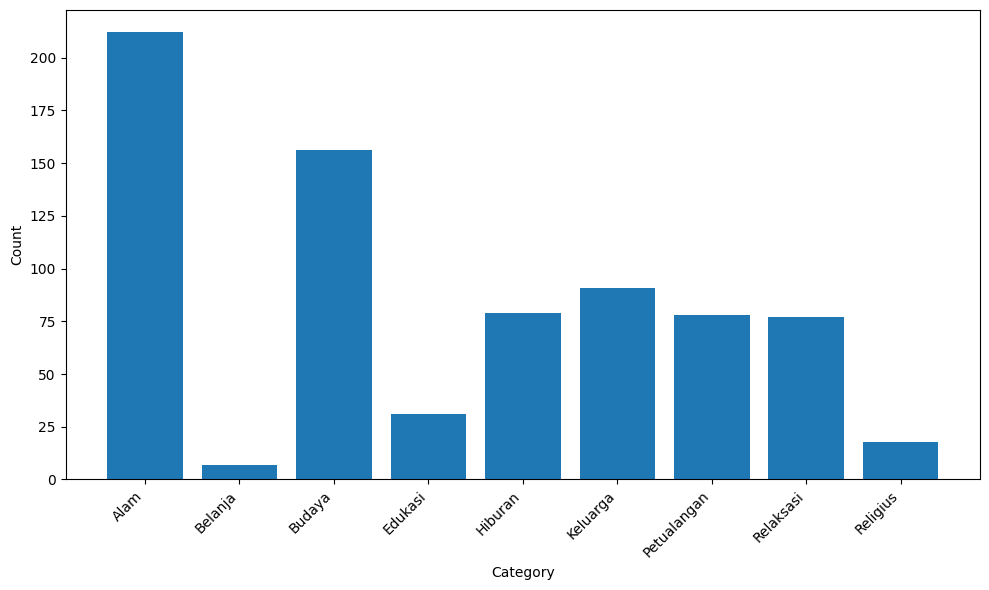

In [18]:
category_counts = {}

for entry in df['Category']:
    for category in entry:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

print("Category Counts:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

# Sort categories alphabetically
sorted_categories = sorted(category_counts.keys())
counts = [category_counts[category] for category in sorted_categories]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [17]:
for entry in df['Category']:
    for i in range(len(entry)):
        if entry[i] == "Olahraga":
            entry[i] = "Relaksasi"

In [20]:
df['Category'] = [list(set(entry)) for entry in df['Category']]

In [22]:
df[df['City'].isna()]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Rating_Count
22,23,Gereja Katedral,"Gereja Katedral Jakarta, atau bernama resmi Ge...",[Budaya],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,57,Taman Lapangan Banteng,"Lapangan Banteng, dulu bernama Waterlooplein (...","[Relaksasi, Hiburan]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,170,Candi Borobudur,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...","[Relaksasi, Budaya]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,270,Bukit Bintang,Bukit Bintang (Melayu [bu.ket̚ bi.ntaŋ],"[Petualangan, Alam]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,280,Gereja Tiberias Indonesia Bandung,"Gereja Tiberias Indonesia (GTI), atau Tiberias...",[Religius],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,339,Sam Poo Kong Temple,Sam Poo Kong (Hanzi:,"[Budaya, Religius]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,381,Tugu Muda Semarang,"Tugu Muda (""Monumen Pemuda"" Indonesia) adalah ...","[Edukasi, Budaya]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
places = df[["Place_Id", "Place_Name", "Category", "Rating"]]

In [24]:
places

,Place_Id,Place_Name,Category,Rating
0,1,Monumen Nasional,"[Keluarga, Budaya]",4.6
1,2,Kota Tua,[Budaya],4.6
2,3,Dunia Fantasi,"[Keluarga, Hiburan]",4.6
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5
...,...,...,...,...
432,433,Museum Mpu Tantular,"[Edukasi, Budaya]",4.4
433,434,Taman Bungkul,"[Relaksasi, Alam]",4.6
434,435,Taman Air Mancur Menari Kenjeran,"[Alam, Hiburan]",4.4
435,436,Taman Flora Bratang Surabaya,"[Relaksasi, Alam]",4.6


In [25]:
# Example user ratings data
user_ratings = ratings_df

# Expanded place categories data
place_data = places

# Explode the categories into separate rows
place_data_exploded = place_data.explode('Category')

# Merging user ratings with place categories
merged_data = pd.merge(user_ratings, place_data_exploded, on='Place_Id')

# Pivoting data to get categories as columns
pivot_data = merged_data.pivot_table(index='User_Id', columns='Category', values='Place_Ratings', aggfunc='mean').fillna(0)

# Calculate rating count and average rating
user_stats = merged_data.groupby('User_Id').agg(
    rating_count=('Place_Ratings', 'count'),
    rating_ave=('Place_Ratings', 'mean')
).reset_index()

# Combining user statistics with pivot data
final_data = pd.merge(user_stats, pivot_data, on='User_Id').round(1)


# Get the count of unique places rated by each user
counts = ratings_df.groupby('User_Id')['Place_Id'].nunique()

# Duplicate rows based on the count of places rated by each user
df_duplicated = final_data.loc[final_data.index.repeat(counts)].reset_index(drop=True)
df_duplicated
# df_duplicated_shuffled = df_duplicated.sample(frac=1).reset_index(drop=True)
# df_duplicated_shuffled

,User_Id,rating_count,rating_ave,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Petualangan,Relaksasi,Religius
0,1,49,3.3,3.2,0.0,3.4,3.0,3.4,3.0,3.3,3.3,2.0
1,1,49,3.3,3.2,0.0,3.4,3.0,3.4,3.0,3.3,3.3,2.0
2,1,49,3.3,3.2,0.0,3.4,3.0,3.4,3.0,3.3,3.3,2.0
3,1,49,3.3,3.2,0.0,3.4,3.0,3.4,3.0,3.3,3.3,2.0
4,1,49,3.3,3.2,0.0,3.4,3.0,3.4,3.0,3.3,3.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9592,300,41,3.1,2.9,0.0,3.7,2.5,2.8,3.0,2.7,3.2,4.0
9593,300,41,3.1,2.9,0.0,3.7,2.5,2.8,3.0,2.7,3.2,4.0
9594,300,41,3.1,2.9,0.0,3.7,2.5,2.8,3.0,2.7,3.2,4.0
9595,300,41,3.1,2.9,0.0,3.7,2.5,2.8,3.0,2.7,3.2,4.0


In [26]:
ratings_df.duplicated().sum()

79

In [27]:
ratings_df.drop_duplicates(inplace=True)

In [28]:
ratings_df.shape[0]

9921

In [ ]:
# # Group by both User_Id and Place_Id and count the occurrences
# ratings_counts = ratings_df.groupby(['User_Id', 'Place_Id']).size().reset_index(name='Rating_Counts')

# # Filter the groups where the count of ratings is greater than 1
# duplicated_ratings = ratings_counts[ratings_counts['Rating_Counts'] > 1]

# # Display the duplicated ratings
# print(duplicated_ratings)

In [29]:
ratings_df = ratings_df.groupby(['User_Id', 'Place_Id'])['Place_Ratings'].mean().reset_index(name='Average_Rating').round(0)
sum(ratings_df.groupby('User_Id')['Place_Id'].nunique())

9597

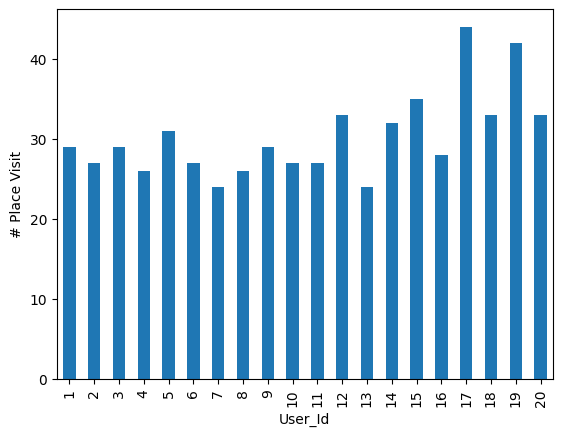

In [30]:
counts = ratings_df.groupby('User_Id')['Place_Id'].nunique()[:20]

counts.plot(kind='bar')
plt.xlabel('User_Id')
plt.ylabel('# Place Visit')
plt.show()

### Explore and prepare the places_df

In [32]:
places_category = places.copy(deep=True)

# Iterate through df, then append the places category as columns of 1s or 0s.
# 1 if that column contains places in the category at the present index and 0 if not.

x = []
for index, row in places.iterrows():
    x.append(index)
    for genre in row['Category']:
        places_category.at[index, genre] = 1

places_category.head()

,Place_Id,Place_Name,Category,Rating,Keluarga,Budaya,Hiburan,Petualangan,Alam,Belanja,Relaksasi,Religius,Edukasi
0,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Kota Tua,[Budaya],4.6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Dunia Fantasi,"[Keluarga, Hiburan]",4.6,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [33]:
# Filling in the NaN values with 0 to show that a place doesn't have that column's category
places_category = places_category.fillna(0)
sorted_columns = sorted(places_category.columns[4:])
places_category = places_category.reindex(columns=places_category.columns[:4].tolist() + sorted_columns)
places_category.head()

,Place_Id,Place_Name,Category,Rating,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Petualangan,Relaksasi,Religius
0,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,Kota Tua,[Budaya],4.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Dunia Fantasi,"[Keluarga, Hiburan]",4.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,Taman Mini Indonesia Indah (TMII),"[Budaya, Hiburan]",4.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Atlantis Water Adventure,"[Petualangan, Hiburan]",4.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
# Get the count of unique places rated by each user
places_count = ratings_df.groupby('Place_Id')['User_Id'].nunique()

# Duplicate rows based on the count of places rated by each user
places_duplicated = places_category.loc[places_category.index.repeat(places_count)].reset_index(drop=True)
places_duplicated
# places_duplicated_shuffled = places_duplicated.sample(frac=1).reset_index(drop=True)
# places_duplicated_shuffled

,Place_Id,Place_Name,Category,Rating,Alam,Belanja,Budaya,Edukasi,Hiburan,Keluarga,Petualangan,Relaksasi,Religius
0,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,Monumen Nasional,"[Keluarga, Budaya]",4.6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,437,Gereja Perawan Maria Tak Berdosa Surabaya,[Relaksasi],4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9593,437,Gereja Perawan Maria Tak Berdosa Surabaya,[Relaksasi],4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9594,437,Gereja Perawan Maria Tak Berdosa Surabaya,[Relaksasi],4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9595,437,Gereja Perawan Maria Tak Berdosa Surabaya,[Relaksasi],4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### RecSys Using Cosine Similarity

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2 = df.copy(deep=True)
df2["Category"] = df2["Category"].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
def recommendation(city, categories):
    data = df2[(df2['City'] == city) & (df2['Category'].str.contains('|'.join(categories), case=False, na=False))]
    if data.empty:
        return "Tidak ada tempat wisata dalam kategori yang dicari di kota ini."
    data.reset_index(drop=True, inplace=True)

    # Convert each place name into vectors using TF-IDF and bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df=1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Place_Name'])

    # Calculate the similarity between place names using cosine similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to place names
    sig = list(enumerate(sg[-1]))
    sig = sorted(sig, key=lambda x: x[1], reverse=True)

    # Top 10 recommendations
    top_10_indices = [i[0] for i in sig[1:11]]
    recommendations = data.iloc[top_10_indices][['Place_Name', 'City', "Price", "Category"]]

    return recommendations

In [40]:
recommendation('Yogyakarta', ["Keluarga", "Hiburan", "Alam"])

,Place_Name,City,Price,Category
0,Taman Pintar Yogyakarta,Yogyakarta,6000.0,"Keluarga, Budaya"
1,Sindu Kusuma Edupark (SKE),Yogyakarta,20000.0,"Keluarga, Hiburan"
2,De Mata Museum Jogja,Yogyakarta,50000.0,"Budaya, Hiburan"
3,Gembira Loka Zoo,Yogyakarta,60000.0,"Keluarga, Hiburan"
4,Desa Wisata Sungai Code Jogja Kota,Yogyakarta,0.0,"Alam, Budaya"
5,Taman Pelangi Yogyakarta,Yogyakarta,15000.0,"Keluarga, Hiburan"
6,Tebing Breksi,Yogyakarta,20000.0,"Petualangan, Alam"
7,Candi Donotirto,Yogyakarta,0.0,"Alam, Budaya"
8,Embung Tambakboyo,Yogyakarta,0.0,"Relaksasi, Alam"
9,Hutan Pinus Pengger,Yogyakarta,3000.0,"Relaksasi, Alam"


In [ ]:
# pip install Flask

### RecSys Using DL

In [41]:
y_train = np.array(ratings_df['Average_Rating'])

In [42]:
user_train = np.array(df_duplicated)
scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

item_train = np.array(places_duplicated.drop(['Place_Name', 'Category'], axis=1))
scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))

In [45]:
num_user_features = user_train.shape[1] - 3
num_item_features = item_train.shape[1] - 1

In [46]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"place/item training data shape: {item_train.shape}")
print(f"place/item test data shape: {item_test.shape}")

place/item training data shape: (7677, 11)
place/item test data shape: (1920, 11)


In [48]:
tf.random.set_seed(1)
num_outputs = 5
user_NN = tf.keras.models.Sequential([
    ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ###
])

item_NN = tf.keras.models.Sequential([
    ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ###
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 5)                    44037     ['input_3[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 5)                    44293     ['input_4[0][0]']             
                                                                                            

In [49]:
tf.random.set_seed(1)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )

In [50]:
tf.random.set_seed(1)
model.fit([user_train[:, 3:], item_train[:, 1:]], y_train, epochs=100)

Epoch 1/50
240/240 [==============================] - 6s 11ms/step - loss: 0.4688 - root_mean_squared_error: 0.6847
Epoch 2/50
240/240 [==============================] - 2s 10ms/step - loss: 0.4563 - root_mean_squared_error: 0.6755
Epoch 3/50
240/240 [==============================] - 4s 17ms/step - loss: 0.4543 - root_mean_squared_error: 0.6740
Epoch 4/50
240/240 [==============================] - 2s 10ms/step - loss: 0.4524 - root_mean_squared_error: 0.6726
Epoch 5/50
240/240 [==============================] - 2s 7ms/step - loss: 0.4517 - root_mean_squared_error: 0.6721
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723
Epoch 8/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4520 - root_mean_squared_error: 0.6723
Epoch 9/50
240/240 [==============================] - 1s 4ms/step - loss: 0.

In [51]:
model.evaluate([user_test[:, 3:], item_test[:, 1:]], y_test)

60/60 [==============================] - 0s 2ms/step - loss: 0.4720 - root_mean_squared_error: 0.6870


[0.4719897508621216, 0.6870151162147522]

In [60]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Predictions

In [ ]:
# loaded_model = tf.keras.models.load_model('model.h5')
# loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 17)]                 0         []                            
                                                                                                  
 sequential (Sequential)     (None, 15)                   39183     ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 15)                   39439     ['input_2[0][0]']             
                                                                                              

In [52]:
new_user_id = 301
place_ref = 'Yogyakarta'
new_rating_ave = 0.0
new_alam = 2.0
new_belanja = 0.0
new_budaya = 4.0
new_edukasi = 0.0
new_hiburan = 5.0
new_keluarga = 5.0
new_petualangan = 0.0
new_relaksasi = 0.0
new_religius = 0.0
new_rating_count = 0

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_alam , new_belanja, new_budaya, new_edukasi, new_hiburan,
                      new_keluarga, new_petualangan, new_relaksasi, new_religius]])

In [54]:
item_vecs = places_category.drop(['Place_Name', 'Category'], axis=1)
item_vecs = np.array(item_vecs)

In [55]:
user_vecs = np.tile(user_vec, (len(item_vecs), 1))
pd.DataFrame(user_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11
0,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
1,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
2,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
3,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
4,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
433,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
434,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0
435,301.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0


In [56]:
# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# make a prediction
y_p = model.predict([suser_vecs[:, 3:], sitem_vecs[:,1:]])

# unscale y prediction
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display
sorted_items = sorted_items[:, 0].astype(int)

14/14 [==============================] - 0s 2ms/step


In [58]:
from collections import Counter
kota = df.loc[df['City'] == "Yogyakarta"]
counts = Counter(tuple(sublist) for sublist in kota['Category'])
print(pd.DataFrame(counts.items(), columns=['Category', '#']))

              Category   #
0   (Keluarga, Budaya)   1
1            (Budaya,)  36
2  (Keluarga, Hiburan)   6
3    (Budaya, Hiburan)   1
4  (Relaksasi, Budaya)   1
5       (Alam, Budaya)   3
6  (Petualangan, Alam)  32
7    (Relaksasi, Alam)  10
8     (Keluarga, Alam)  33
9      (Alam, Hiburan)   2


In [59]:
recommendation = df.iloc[sorted_index][['Place_Id', 'Place_Name', 'Category', 'City']]
recommendation.loc[recommendation['City'] == place_ref].head(10)

,Place_Id,Place_Name,Category,City
129,130,Studio Alam Gamplong,"[Alam, Hiburan]",Yogyakarta
206,207,Heha Sky View,"[Alam, Hiburan]",Yogyakarta
92,93,Gembira Loka Zoo,"[Keluarga, Hiburan]",Yogyakarta
182,183,Jogja Bay Pirates Adventure Waterpark,"[Keluarga, Hiburan]",Yogyakarta
113,114,The Lost World Castle,"[Keluarga, Hiburan]",Yogyakarta
202,203,Galaxy Waterpark Jogja,"[Keluarga, Hiburan]",Yogyakarta
97,98,Taman Pelangi Yogyakarta,"[Keluarga, Hiburan]",Yogyakarta
86,87,Sindu Kusuma Edupark (SKE),"[Keluarga, Hiburan]",Yogyakarta
104,105,Candi Donotirto,"[Alam, Budaya]",Yogyakarta
133,134,Desa Wisata Gamplong,"[Alam, Budaya]",Yogyakarta
